In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

import librosa

In [77]:
## 함수 목록 ##

def get_file_list(cls):
    if cls == 1:
        folder_path = 'dataset' # siren
    else:
        folder_path = 'dataset2' # others
    file_list = os.listdir(folder_path)
#     file_list = [os.path.abspath(os.path.join(folder_path, file)) for file in file_list] 
    return file_list

In [110]:
len(get_file_list(1))

443

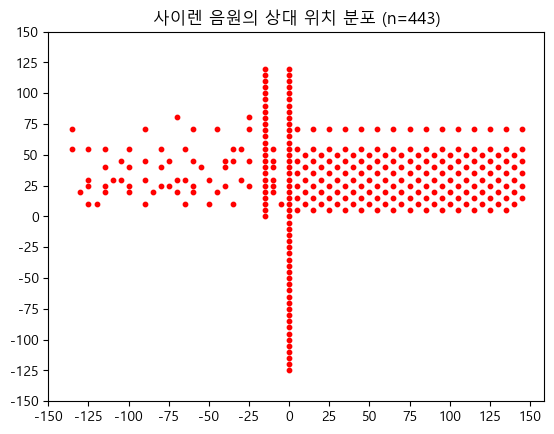

In [112]:
## 데이터 위치 분포 확인 ##

def get_loc_dist(cls):
    file_list = get_file_list(cls)
    x_list = []
    y_list = []
    for i in range(len(file_list)):
        x_list.append(float(file_list[i].split('.')[0].split('_')[0]))
        y_list.append(float(file_list[i].split('.')[0].split('_')[1]))
        
    plt.scatter(x_list,y_list, s=10, c='red')
    plt.xticks(range(-150, 160, 25))
    plt.yticks(range(-150, 160, 25))
    plt.title('사이렌 음원의 상대 위치 분포 (n=443)')

get_loc_dist(2)

In [127]:
exm_file = np.float64(np.array(pd.read_csv(f'dataset/{get_file_list(1)[0]}').iloc[:,0]))

In [128]:
len(exm_file)

250

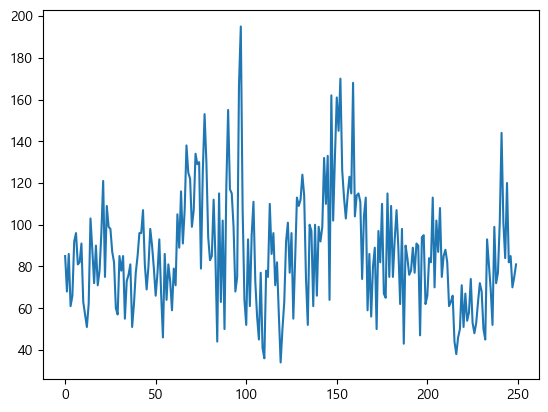

In [129]:
plt.plot(exm_file)

Text(0.5, 1.0, '데이터 샘플 포인트 예시 2 (50Hz, 5s)')

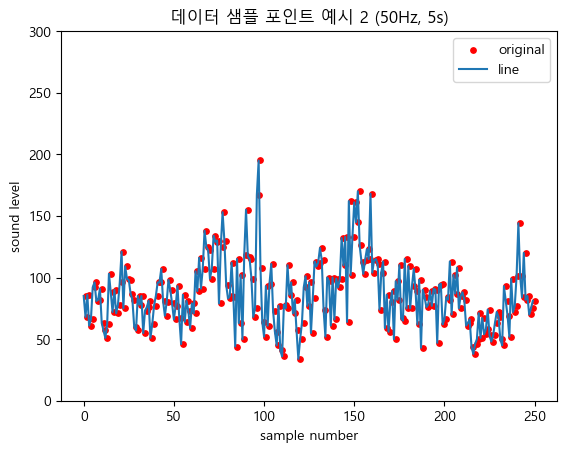

In [168]:
## 샘플 시각화 ##
plt.scatter(range(1,251), exm_file, label='original', c='red', s=15)
plt.plot(exm_file, label='line')
plt.yticks(range(0,350,50))
plt.xlabel('sample number')
plt.ylabel('sound level')
plt.legend()
plt.title('데이터 샘플 포인트 예시 2 (50Hz, 5s)')

Text(0.5, 1.0, '리샘플링 예시 1 (22.5kHz, 5s)')

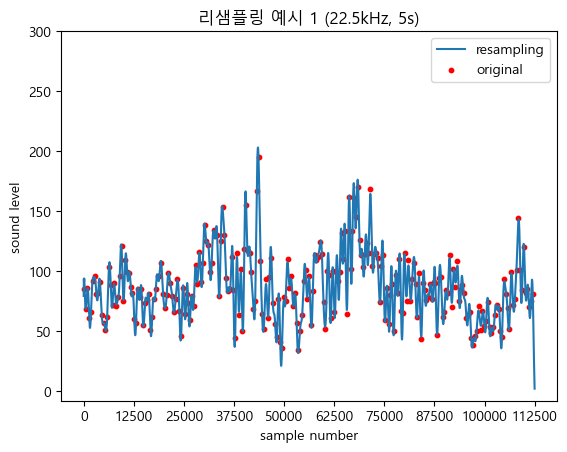

In [192]:
## 리샘플링 ##
rsp_file = librosa.resample(exm_file, orig_sr=50, target_sr=22500) ## type: nd.array, len: 112,500(5s)
plt.plot(rsp_file, label='resampling')
# plt.scatter(range(1, 112501),rsp_file, label='resampling', c='red', s=1)
# plt.plot(range(1, 112501, 450), exm_file, label='original line')
plt.scatter(range(1, 112501, 450), exm_file, label='original', c='red', s=10)
plt.xticks(range(0,112501, 12500))
plt.yticks(range(0,350,50))
plt.xlabel('sample number')
plt.ylabel('sound level')
plt.legend()
plt.title('리샘플링 예시 1 (22.5kHz, 5s)')

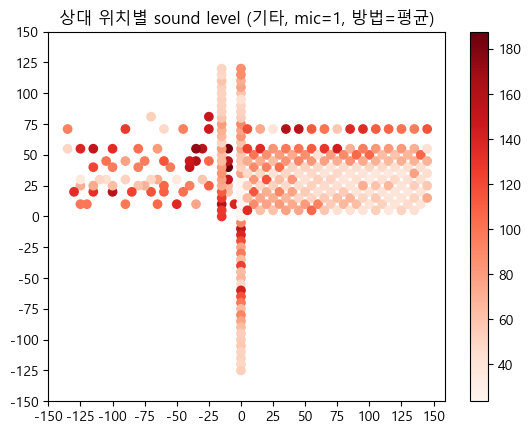

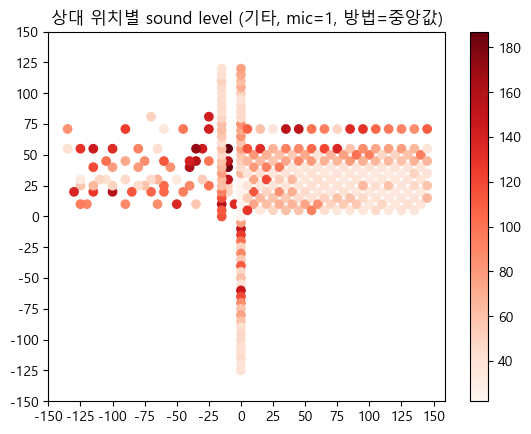

In [224]:
## 채널별 sound level 시각화 ##

def vis_sound_level_by_channel(cls, channel, mtd):
    file_list = get_file_list(cls)
    x_list = []
    y_list = []
    z_list = []
    for i in range(len(file_list)):
        x_list.append(float(file_list[i].split('.')[0].split('_')[0]))
        y_list.append(float(file_list[i].split('.')[0].split('_')[1]))
        if cls == 1:
            folder_path = 'dataset'
        else:
            folder_path = 'dataset2'
        if mtd == 1:
            z_list.append(np.mean(pd.read_csv(f'{folder_path}/{file_list[i]}').iloc[:,channel-1]))
        elif mtd == 2:
            z_list.append(np.median(pd.read_csv(f'{folder_path}/{file_list[i]}').iloc[:,channel-1]))
            
    plt.scatter(x_list, y_list, c=z_list, cmap='Reds')
    
    plt.xticks(range(-150, 160, 25))
    plt.yticks(range(-150, 160, 25))
    
    if cls == 1:
        cls_name = '사이렌'
    else:
        cls_name = '기타'
    if mtd == 1:
        mtd_name = '평균'
    else:
        mtd_name = '중앙값'
        
    plt.title(f'상대 위치별 sound level ({cls_name}, mic={channel}, 방법={mtd_name})')

    plt.colorbar()

    plt.show()
    
vis_sound_level_by_channel(2,1,1)
vis_sound_level_by_channel(2,1,2)

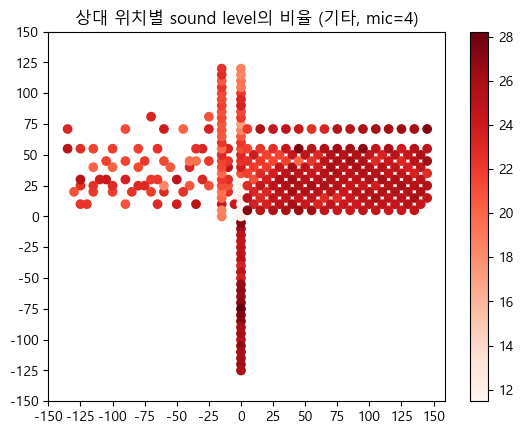

In [259]:
## 채널별 sound level 시각화 ## --> 상대 비율편

def vis_sound_level_by_channel_relative(cls, channel):
    file_list = get_file_list(cls)
    x_list = []
    y_list = []
    z_list = []
    chn_dict = {1:[1,2,3], 2:[0,2,3], 3:[0,1,3], 4:[0,1,2]}
    for i in range(len(file_list)):
        x_list.append(float(file_list[i].split('.')[0].split('_')[0]))
        y_list.append(float(file_list[i].split('.')[0].split('_')[1]))
        if cls == 1:
            folder_path = 'dataset'
        else:
            folder_path = 'dataset2'
        
        pri_chn = pd.read_csv(f'{folder_path}/{file_list[i]}').iloc[:,channel-1].sum().sum()
        all_chn = pd.read_csv(f'{folder_path}/{file_list[i]}').sum().sum()
        z_list.append(pri_chn/all_chn*100)

            
    plt.scatter(x_list, y_list, c=z_list, cmap='Reds')
    
    plt.xticks(range(-150, 160, 25))
    plt.yticks(range(-150, 160, 25))
    
    if cls == 1:
        cls_name = '사이렌'
    else:
        cls_name = '기타'
        
    plt.title(f'상대 위치별 sound level의 비율 ({cls_name}, mic={channel})')

    plt.colorbar()

    plt.show()
    
vis_sound_level_by_channel_relative(2,4)

             mic1        mic2        mic3        mic4
count  250.000000  250.000000  250.000000  250.000000
mean   187.708000  206.260000  197.952000  195.632000
std     43.976431   46.138089   46.429349   48.271078
min     87.000000   95.000000   81.000000   79.000000
25%    157.000000  169.000000  164.250000  159.250000
50%    185.500000  205.000000  196.500000  193.000000
75%    216.750000  239.750000  231.500000  234.500000
max    305.000000  329.000000  334.000000  342.000000
             mic1        mic2        mic3        mic4
count  250.000000  250.000000  250.000000  250.000000
mean    49.916000   52.952000   55.480000   46.128000
std     31.178926   34.644808   36.856849   19.827155
min     25.000000   22.000000   21.000000   23.000000
25%     34.000000   34.000000   36.000000   35.000000
50%     42.000000   42.500000   44.000000   41.000000
75%     57.750000   61.000000   64.750000   52.000000
max    342.000000  347.000000  355.000000  174.000000
             mic1        mic

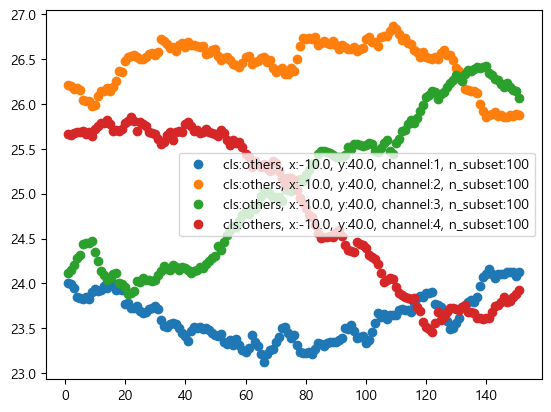

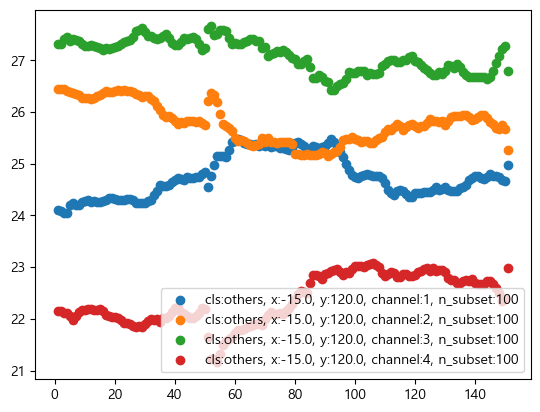

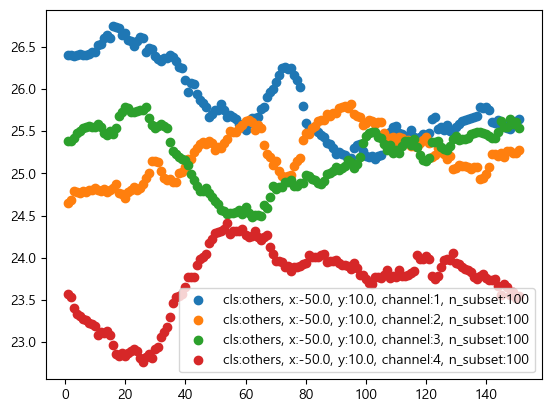

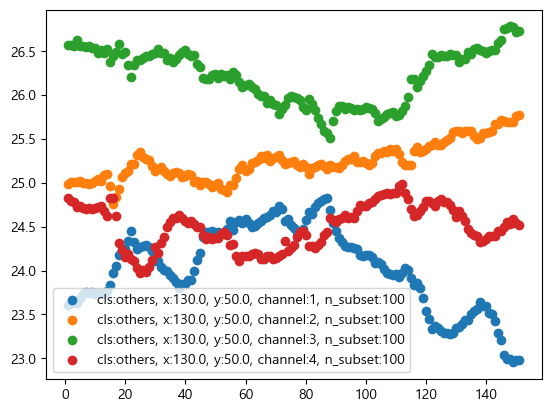

In [369]:
def one_file_relative(cls, i, channel):
    file_list = get_file_list(cls)
    x = float(file_list[i].split('.')[0].split('_')[0])
    y = float(file_list[i].split('.')[0].split('_')[1])
    
    if cls == 1:
        folder_path = 'dataset'
        cls_name = 'siren'
    else:
        folder_path = 'dataset2'
        cls_name = 'others'

    df = pd.read_csv(f'{folder_path}/{file_list[i]}')
    
    if channel == 4:
        print(df.describe())

    z_list = []
    
    k = 100

    for j in range(0,251-k):
        df2 = df.iloc[j:j+k,:]
        pri_chn = df2.iloc[:,channel-1].sum().sum()
        all_chn = df2.sum().sum()
        z_list.append(pri_chn/all_chn*100)

    plt.scatter(range(1,252-k),z_list, label=f'cls:{cls_name}, x:{x}, y:{y}, channel:{channel}, n_subset:{k}')
    plt.legend()
    
cls_input = 0
for i_input in [9,31,64,183]:
    plt.figure()
    one_file_relative(cls_input,i_input,1)
    one_file_relative(cls_input,i_input,2)
    one_file_relative(cls_input,i_input,3)
    one_file_relative(cls_input,i_input,4)

,mic1,mic2,mic3,mic4
count,250.00000,250.000000,250.000000,250.000000
mean,87.02000,77.336000,76.832000,72.656000
std,27.25743,23.940839,21.633581,20.917933
min,34.00000,32.000000,35.000000,35.000000
25%,67.25000,59.250000,62.000000,58.250000
50%,84.00000,74.500000,74.000000,68.500000
75%,102.00000,89.750000,87.000000,84.000000
max,195.00000,161.000000,158.000000,158.000000


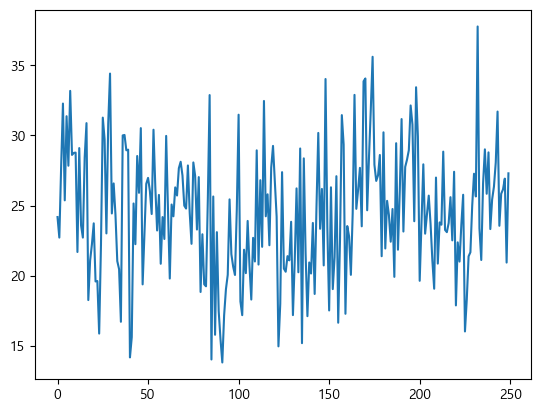

In [280]:
i = 0
cls = 1
channel = 2

file_list = get_file_list(1)
x = float(file_list[i].split('.')[0].split('_')[0])
y = float(file_list[i].split('.')[0].split('_')[1])

if cls == 1:
    folder_path = 'dataset'
else:
    folder_path = 'dataset2'

df = pd.read_csv(f'{folder_path}/{file_list[i]}')

chn_list = np.array(df.iloc[:,channel-1]) / np.array(df.sum(axis=1)) * 100
plt.plot(chn_list)